In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
print(os.listdir("./CMAPSSData"))

['Damage Propagation Modeling.pdf', 'readme.txt', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']


In [2]:
train= pd.read_csv('./CMAPSSData/train_FD001.txt', sep=" ", header=None)
test = pd.read_csv('./CMAPSSData/test_FD001.txt', sep=" ", header=None)
print("train shape: ", train.shape, "test shape: ", test.shape)

train shape:  (20631, 28) test shape:  (13096, 28)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [4]:
# Удалим сенсоры с пропущенными значениями
train.drop(train.columns[[26, 27]], axis=1, inplace=True)
test.drop(test.columns[[26, 27]], axis=1, inplace=True)

In [5]:
# Обработка входных данных
target_var = ['RUL']
index_columns_names =  ["Unit_Number", "Time_in_cycles"]
op_columns = ["Operational_Setting_"+str(i) for i in range(1,4)]
sensor_columns =["Sensor_"+str(i) for i in range(1,22)]
column_names = index_columns_names + op_columns + sensor_columns
print(column_names)

['Unit_Number', 'Time_in_cycles', 'Operational_Setting_1', 'Operational_Setting_2', 'Operational_Setting_3', 'Sensor_1', 'Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_6', 'Sensor_7', 'Sensor_8', 'Sensor_9', 'Sensor_10', 'Sensor_11', 'Sensor_12', 'Sensor_13', 'Sensor_14', 'Sensor_15', 'Sensor_16', 'Sensor_17', 'Sensor_18', 'Sensor_19', 'Sensor_20', 'Sensor_21']


In [6]:
train.columns = column_names
test.columns = column_names
train.head(5)

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
#train.to_csv('train.csv', index=False)

In [8]:
# Найдём последний цикл для каждого двигателя
max_cycle = train.groupby('Unit_Number')['Time_in_cycles'].max().reset_index()
max_cycle.columns = ['Unit_Number', 'Max_of_cycle']

In [9]:
train_merged = train.merge(max_cycle, left_on='Unit_Number', right_on='Unit_Number', how='inner')

In [10]:
# Рассчитаем RUL для каждой строки
RUL = train_merged["Max_of_cycle"] - train_merged["Time_in_cycles"]
train_with_target = train_merged["RUL"] = RUL

In [11]:
train_with_target = train_merged.drop("Max_of_cycle", axis=1)
train_with_target.head(5)

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [12]:
x_sens = train_with_target.columns[5:-1]

In [13]:
x_col = ['Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_7', 'Sensor_8', 'Sensor_9',
       'Sensor_11', 'Sensor_12', 'Sensor_13', 'Sensor_14', 'Sensor_15',
       'Sensor_17', 'Sensor_20', 'Sensor_21']

In [14]:
def ris():
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), 
          (ax17, ax18, ax19, ax20)) = plt.subplots(5,4, figsize = (15,20))

    ax1.hist(train_with_target['Sensor_1'])
    ax1.set_title('Sensor_1')
    ax2.hist(train_with_target['Sensor_2'])
    ax2.set_title('Sensor_2')
    ax3.hist(train_with_target['Sensor_3'])
    ax3.set_title('Sensor_3')

    ax4.hist(train_with_target['Sensor_4'])
    ax4.set_title('Sensor_4')
    ax5.hist(train_with_target['Sensor_5'])
    ax5.set_title('Sensor_5')
    ax6.hist(train_with_target['Sensor_6'])
    ax6.set_title('Sensor_6')
    
    ax7.hist(train_with_target['Sensor_7'])
    ax7.set_title('Sensor_7')
    ax8.hist(train_with_target['Sensor_8'])
    ax8.set_title('Sensor_8')
    ax9.hist(train_with_target['Sensor_9'])
    ax9.set_title('Sensor_9')
    
    ax10.hist(train_with_target['Sensor_10'])
    ax10.set_title('Sensor_10')
    ax11.hist(train_with_target['Sensor_11'])
    ax11.set_title('Sensor_11')
    ax12.hist(train_with_target['Sensor_12'])
    ax12.set_title('Sensor_12')

    ax13.hist(train_with_target['Sensor_13'])
    ax13.set_title('Sensor_13')
    ax14.hist(train_with_target['Sensor_14'])
    ax14.set_title('Sensor_14')
    ax15.hist(train_with_target['Sensor_15'])
    ax15.set_title('Sensor_15')

    ax16.hist(train_with_target['Sensor_16'])
    ax16.set_title('Sensor_16')
    ax17.hist(train_with_target['Sensor_17'])
    ax17.set_title('Sensor_17')
    ax18.hist(train_with_target['Sensor_18'])
    ax18.set_title('Sensor_18')

    ax19.hist(train_with_target['Sensor_19'])
    ax19.set_title('Sensor_19')
    ax20.hist(train_with_target['Sensor_20'])
    ax20.set_title('Sensor_20')

In [15]:
font = {'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
import matplotlib.pylab as pylab
params = {'axes.titlesize':'x-large',
         'axes.titleweight':'bold'}

pylab.rcParams.update(params)

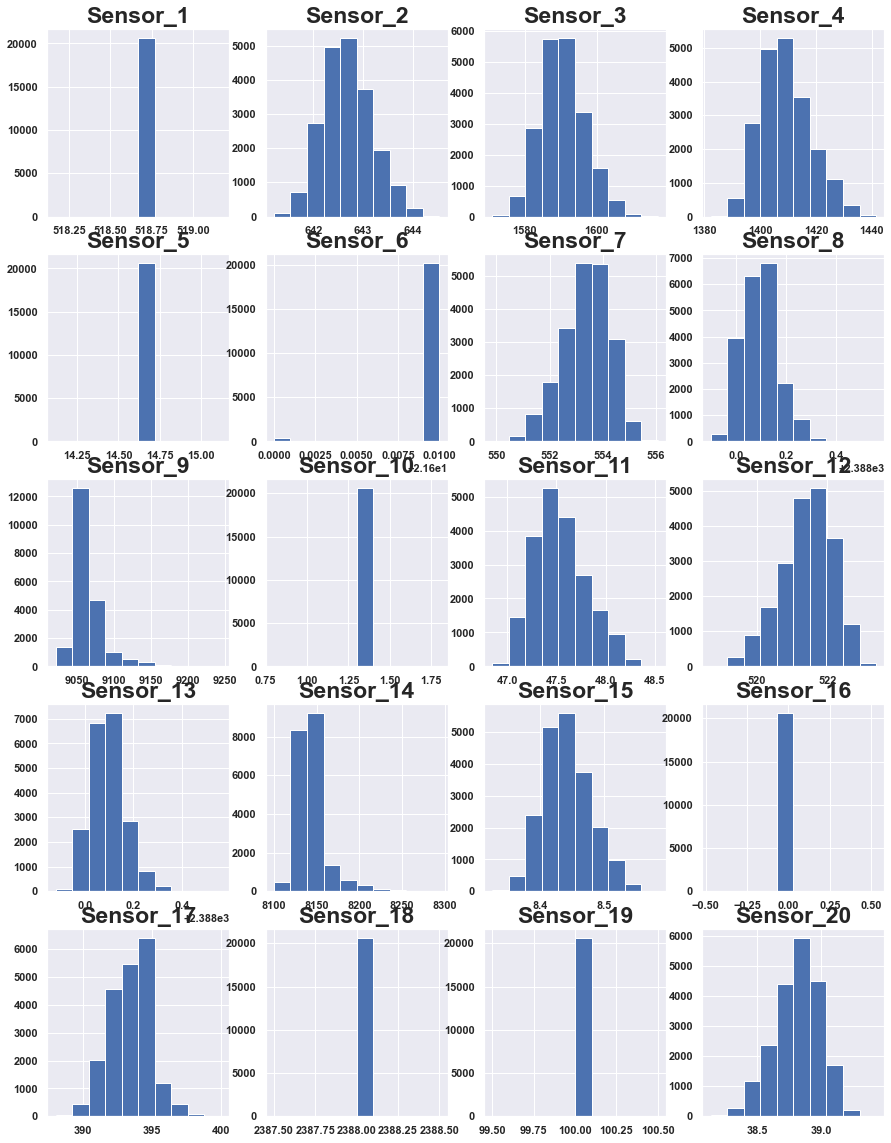

In [16]:
ris()

# Отбор признаков

In [17]:
train_without_const = train_with_target.drop(['Operational_Setting_1', 'Operational_Setting_2', 'Operational_Setting_3', 'Sensor_1', 'Sensor_5', 'Sensor_6', 'Sensor_10', 'Sensor_16', 'Sensor_18', 'Sensor_19'], axis=1)

### Марица корреляций

In [18]:
sns.set(font_scale=1.3)

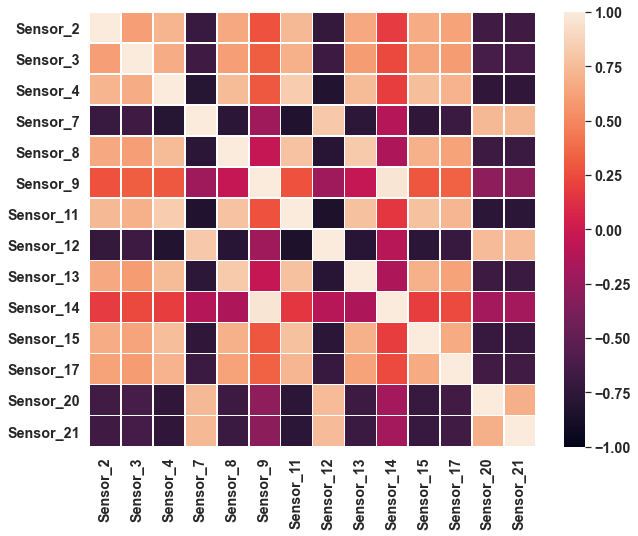

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_without_const[x_col].corr(), linewidths=.5, vmin=-1, vmax=1)

### Показания датчиков

In [20]:
var_to_use = ['Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_7', 'Sensor_8', 'Sensor_9',
       'Sensor_11', 'Sensor_12', 'Sensor_13', 'Sensor_15',
       'Sensor_17', 'Sensor_20', 'Sensor_21']

In [22]:
var_to_use_1 = ['Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_7']
var_to_use_2 = ['Sensor_8', 'Sensor_9', 'Sensor_11', 'Sensor_12']
var_to_use_3 = ['Sensor_13', 'Sensor_15', 'Sensor_17', 'Sensor_20']

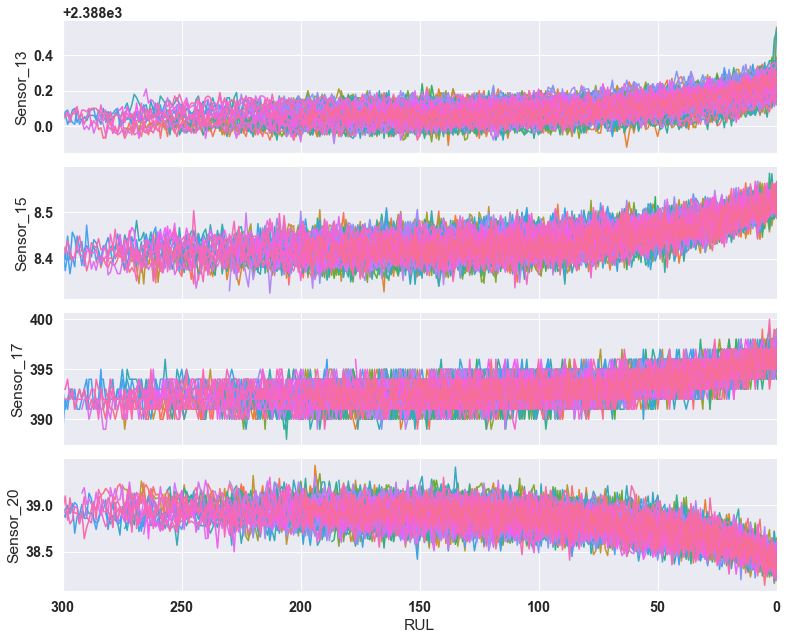

In [25]:
#var_to_use = list(set(train_without_const.columns) - set(['Unit_Number', 'Time_in_cycles', 'RUL']))
explore = sns.PairGrid(data=train_without_const,
                 x_vars=target_var,
                 y_vars=var_to_use_3,
                 hue="Unit_Number", height=2.142857142857143, aspect=5)
explore = explore.map(plt.plot)
explore = explore.set(xlim=(300,0))

In [22]:
train_without_const.head()

,Unit_Number,Time_in_cycles,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [23]:
vars_to_drop = ['Unit_Number', 'Time_in_cycles']
train_only_sensor = train_without_const.drop(vars_to_drop, axis = 1)
print(train_only_sensor.shape)
X = train_only_sensor.drop(['RUL'], axis = 1)
y = train_only_sensor['RUL']

(20631, 15)


In [27]:
#train_without_const.to_csv('train.csv', index=False)

In [24]:
#train_only_sensor.to_csv('train.csv', index=False)

In [30]:
train_only_sensor

,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_17,Sensor_20,Sensor_21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


# Стандартизация данных

In [31]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [32]:
RUL_to_norm = np.array(train_without_const['RUL']).reshape(-1, 1)
scaler_min_max = preprocessing.MinMaxScaler()
scaler_min_max.fit(RUL_to_norm)
RUL_scale = scaler_min_max.transform(RUL_to_norm)

In [33]:
train_df = pd.DataFrame(X_scale)
train_df.columns = X.columns
train_df['Unit_Number'] = train_without_const['Unit_Number'] 
train_df['Time_in_cycles'] = train_without_const['Time_in_cycles']
train_df['RUL'] = RUL_scale
train_df['RUL_1'] = train_without_const['RUL']
train_df.head()

,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_17,Sensor_20,Sensor_21,Unit_Number,Time_in_cycles,RUL,RUL_1
0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,1,1,0.529086,191
1,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,1,2,0.526316,190
2,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,1,3,0.523546,189
3,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792,1,4,0.520776,188
4,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552,1,5,0.518006,187


In [34]:
train_df.shape

(20631, 18)

# Препроцессинг

In [27]:
# pick a large window size of 30 cycles
sequence_length = 30
sequence_cols = X.columns

In [49]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [29]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['Unit_Number']==unit_num], sequence_length, sequence_cols)) 
           for unit_num in train_df['Unit_Number'].unique())

In [30]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(17631, 30, 14)

In [50]:
# function to generate labels
def gen_rul(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [32]:
# generator for the sequences
rul_gen = (list(gen_rul(train_df[train_df['Unit_Number']==unit_num], sequence_length, ['RUL'])) 
           for unit_num in train_df['Unit_Number'].unique())

In [33]:
rul_array = np.concatenate(list(rul_gen)).astype(np.float32)
rul_array.shape

(17631, 1)

# Обучение модели

In [57]:
import keras
# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation

Using TensorFlow backend.


In [33]:
# import tensorflow
# tensorflow.random.set_seed(1234)

In [56]:
# build the network
nb_features = seq_array.shape[2]
nb_out = rul_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(
          units=30,
          return_sequences=False))
model.add(Dropout(0.5))

In [57]:
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
%%time
# fit the network
model.fit(seq_array, rul_array, epochs=10, batch_size=200, validation_split=0.05, verbose=1)

Train on 16749 samples, validate on 882 samples
Epoch 1/10
16749/16749 [==============================] - 7s 394us/step - loss: 0.0294 - val_loss: 0.0085
Epoch 2/10
16749/16749 [==============================] - 6s 357us/step - loss: 0.0153 - val_loss: 0.0085
Epoch 3/10
16749/16749 [==============================] - 6s 349us/step - loss: 0.0135 - val_loss: 0.0083
Epoch 4/10
16749/16749 [==============================] - 6s 387us/step - loss: 0.0123 - val_loss: 0.0090
Epoch 5/10
16749/16749 [==============================] - 6s 382us/step - loss: 0.0114 - val_loss: 0.0084
Epoch 6/10
16749/16749 [==============================] - 6s 360us/step - loss: 0.0099 - val_loss: 0.0106
Epoch 7/10
16749/16749 [==============================] - 6s 379us/step - loss: 0.0093 - val_loss: 0.0085
Epoch 8/10
16749/16749 [==============================] - 6s 371us/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
16749/16749 [==============================] - 6s 336us/step - loss: 0.0083 - val_loss: 0.009

In [35]:
rul_gen_1 = (list(gen_rul(train_df[train_df['Unit_Number']==unit_num], sequence_length, ['RUL_1'])) 
           for unit_num in train_df['Unit_Number'].unique())
rul_array_1 = np.concatenate(list(rul_gen_1)).astype(np.float32)

In [36]:
s_n = seq_array
r_n = rul_array_1

In [ ]:
# make predictions and compute confusion matrix
y_pred = model.predict(s_n, verbose=1, batch_size=200)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = r_n

In [62]:
# training metrics
scores = model.evaluate(s_n, rul_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scaler_min_max.inverse_transform([[scores]])))

17631/17631 [==============================] - 2s 91us/step
Accurracy: [[2.27499279]]


In [63]:
y_pred.shape

(17631, 1)

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("r-squared: ", r2_score(y_true, y_pred))

Mean Squared Error:  821.27234
Mean Absolute Error:  19.18696
r-squared:  0.7841817136568497


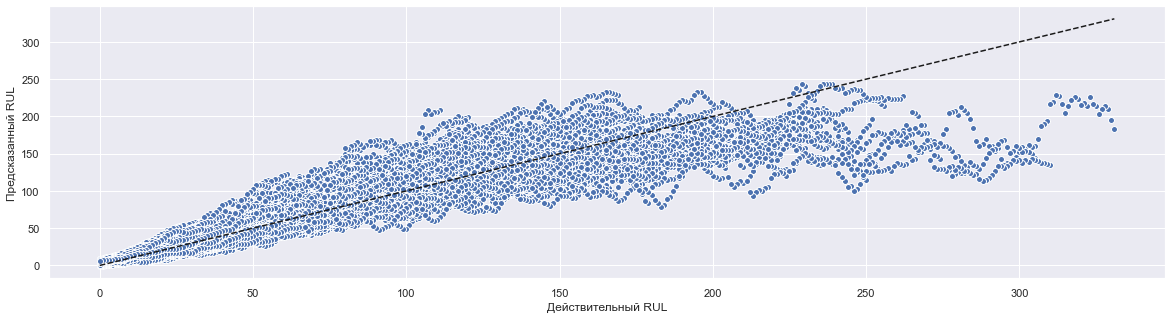

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

# Test

In [38]:
answer_RUL = pd.read_csv('./CMAPSSData/RUL_FD001.txt', header=None)
answer_RUL.columns = ['RUL']
answer_RUL.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [39]:
test

,Unit_Number,Time_in_cycles,Operational_Setting_1,Operational_Setting_2,Operational_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [40]:
test_df = pd.DataFrame(scaler.transform(test[sequence_cols]), columns=sequence_cols)
test_df['Unit_Number'] = test['Unit_Number'] 
test_df['Time_in_cycles'] = test['Time_in_cycles']
test_df.head()

,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_17,Sensor_20,Sensor_21,Unit_Number,Time_in_cycles
0,0.678077,-0.853550,-1.191480,0.601408,-0.798093,-0.682579,-1.277396,0.415614,-0.919841,-0.954235,-0.985107,-0.781710,0.241943,0.774097,1,1
1,-1.941707,-0.338137,-1.501467,1.674769,-1.220725,-0.490117,-0.154141,1.012195,-0.502695,-0.216648,-1.649034,-0.136018,1.127183,0.941305,1,2
2,-0.441831,-0.584426,-0.843717,0.838677,-0.657216,-0.375093,-0.154141,0.754581,-0.919841,-0.715712,0.052112,-0.136018,1.459148,1.172256,1,3
3,-0.481827,-1.044384,-0.279297,0.793483,-0.938970,-0.903570,-0.977861,-0.045381,-0.641744,-0.568929,-1.345067,-1.427402,1.016528,0.775945,1,4
4,-0.341839,-0.543650,-0.779276,0.895170,-1.220725,-0.937081,-0.865536,0.998637,-0.919841,-0.745069,-1.041101,-2.073094,0.961200,1.138999,1,5


In [41]:
max_cycle_test = test_df.groupby('Unit_Number')['Time_in_cycles'].max().reset_index()
max_cycle_test.columns = ['Unit_Number', 'Max_of_cycle']

In [42]:
max_cycle_test[max_cycle_test['Max_of_cycle'] < sequence_length]

,Unit_Number,Max_of_cycle


In [43]:
seq_array_test_last = [test_df[test_df['Unit_Number']==unit_num][sequence_cols].values[-sequence_length:] 
                       for unit_num in test_df['Unit_Number'].unique() if len(test_df[test_df['Unit_Number']==unit_num])>=sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(100, 30, 14)

In [73]:
#y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [74]:
y_pred = model.predict(seq_array_test_last, verbose=1, batch_size=200)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = answer_RUL['RUL']

100/100 [==============================] - 0s 160us/step


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("r-squared: ", r2_score(y_true, y_pred))

Mean Squared Error:  556.0847747906206
Mean Absolute Error:  16.225853281021116
r-squared:  0.677981027177373


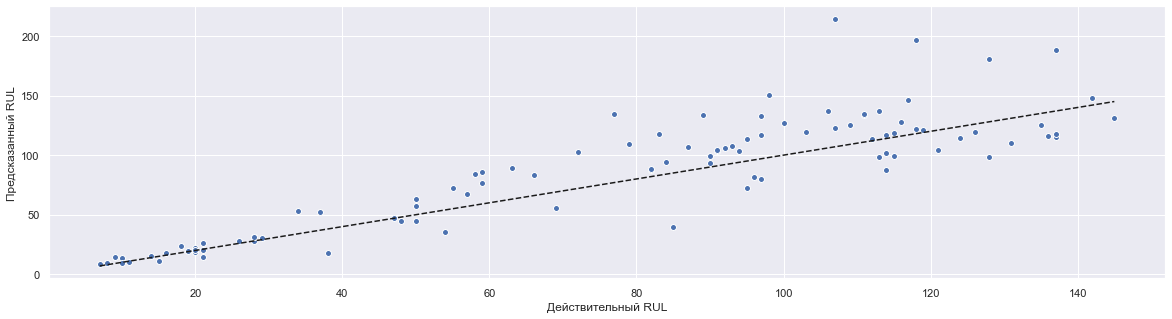

In [76]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

In [77]:
# model.save('LSTM_30.h5')

In [62]:
new_model = keras.models.load_model('LSTM_30.h5')
y_pred = new_model.predict(seq_array_test_last, verbose=1, batch_size=200)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = answer_RUL['RUL']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("r-squared: ", r2_score(y_true, y_pred))

100/100 [==============================] - 0s 2ms/step
Mean Squared Error:  556.0847747906206
Mean Absolute Error:  16.225853281021116
r-squared:  0.677981027177373


In [60]:
# make predictions and compute confusion matrix
y_pred = new_model.predict(s_n, verbose=1, batch_size=200)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = r_n

17631/17631 [==============================] - 2s 137us/step


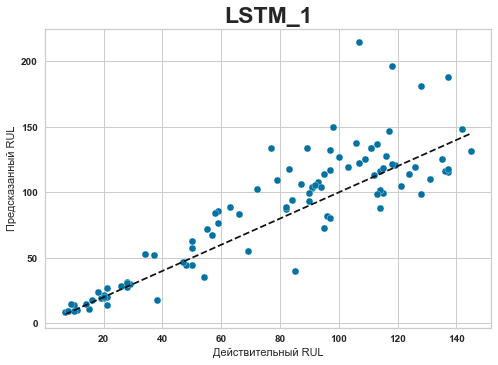

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
ax.set_title('LSTM_1')
# plt.xticks([20, 40, 60, 80, 100, 120, 140])
# plt.yticks([-25, 0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.show()

# Regression methods

Random Forest

In [37]:
def gen_history(data, cycles_number, need_cols):
    df = data[need_cols]
    df_all = df
    for i in cycles_number:
        df_all = df_all.join(df.shift(i), rsuffix = '_'+str(i)+'_back')
    return df_all.dropna()

In [38]:
def gen_history_test(data, cycles_number, need_cols):
    df = data[need_cols]
    df_all = df
    for i in cycles_number:
        df_all = df_all.join(df.shift(i).loc[[df.shift(i).index[-1]]], rsuffix = '_'+str(i)+'_back')
    return df_all.dropna()

In [67]:
transformed_data = pd.DataFrame()
for unit_num in train_df['Unit_Number'].unique():
    temp = gen_history(train_df[train_df['Unit_Number']==unit_num], [10, 20, 30], X.columns)
    transformed_data = pd.concat([transformed_data, temp])

In [68]:
transformed_data.head()

,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,...,Sensor_8_30_back,Sensor_9_30_back,Sensor_11_30_back,Sensor_12_30_back,Sensor_13_30_back,Sensor_14_30_back,Sensor_15_30_back,Sensor_17_30_back,Sensor_20_30_back,Sensor_21_30_back
30,-1.321758,-1.034598,-1.337029,0.861274,-0.234584,-0.292675,-0.491118,0.727463,-0.502695,-0.968390,...,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
31,-0.701809,0.139762,-0.952601,1.799052,-0.798093,-0.646351,-1.090187,0.686787,-0.363646,-0.736681,...,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
32,0.058128,-0.346292,-0.722611,1.403604,-0.798093,-0.820245,-0.977861,0.673229,-0.224597,-0.489246,...,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
33,-0.281844,-1.476613,-0.939269,1.053349,-0.938970,-0.850586,-0.266467,0.388497,-0.085548,-0.898667,...,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
34,-0.481827,-0.085324,-0.659281,1.053349,-0.798093,-0.882286,-0.865536,0.456290,-1.197939,-0.187816,...,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552


In [69]:
transformed_RUL = train_df.loc[transformed_data.index]['RUL']

In [350]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_data, transformed_RUL, test_size=0.2, random_state=1235)

param = {
    'min_samples_leaf': [10],
    'max_depth': [10],
    'n_estimators':[100]
}

grid_random_forest = GridSearchCV(estimator=RandomForestRegressor()
                            , cv=5
                            , param_grid = param
                            , scoring = 'neg_mean_squared_error'
                            , n_jobs = -1
                           )
grid_random_forest.fit(X_train, y_train)

print(grid_random_forest.best_estimator_)

y_pred = grid_random_forest.predict(X_test)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler_min_max.inverse_transform(np.array(y_test).reshape(-1, 1))
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Random Forest Mean Squared Error:  1260.0044300275001
Random Forest Mean Absolute Error:  24.690709342129765
Random Forest r-squared:  0.6601748884515863
Wall time: 52.2 s


In [358]:
# from joblib import dump, load
# dump(grid_random_forest.best_estimator_, 'rf_2.joblib') 
# #clf = load('rf_1.joblib')

['rf_2.joblib']

In [79]:
from joblib import dump, load
clf = load('rf_2.joblib')

In [70]:
transformed_data_test = pd.DataFrame()
for unit_num in test_df['Unit_Number'].unique():
    temp = gen_history_test(test_df[test_df['Unit_Number']==unit_num], [10, 20, 30], X.columns)
    transformed_data_test = pd.concat([transformed_data_test, temp])

In [71]:
transformed_data_test.head()

,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,...,Sensor_8_30_back,Sensor_9_30_back,Sensor_11_30_back,Sensor_12_30_back,Sensor_13_30_back,Sensor_14_30_back,Sensor_15_30_back,Sensor_17_30_back,Sensor_20_30_back,Sensor_21_30_back
30,-0.201850,-1.517390,-1.113706,1.188932,-0.234584,-0.400453,-1.165071,0.510525,-0.502695,-0.715188,...,-0.798093,-0.682579,-1.277396,0.415614,-0.919841,-0.954235,-0.985107,-0.781710,0.241943,0.774097
79,-0.261846,-0.641513,0.210682,0.172064,0.047171,-0.927118,0.482370,0.442731,-0.085548,-0.883465,...,0.610680,-1.080182,-0.528559,0.618994,-0.224597,-0.710994,1.521284,-0.781710,-0.256004,0.226282
205,0.398100,-0.126100,1.106199,-0.878699,0.892435,-0.723788,1.268649,-0.791108,0.609696,-0.644417,...,0.751557,-0.523628,0.332603,-0.099616,1.165891,-0.630788,0.185431,0.509675,-0.256004,0.450766
311,0.198117,0.653544,-0.228188,-0.822207,0.469803,-0.631407,0.407486,0.632553,0.192549,-0.530136,...,0.469803,-0.596990,0.594696,0.103764,0.748745,-0.393837,0.092108,-0.136018,0.573908,-0.504446
409,-0.821799,-0.095110,1.158419,-0.087802,0.047171,-0.509590,-0.303908,-0.560610,0.748745,-0.944275,...,0.469803,-0.519100,0.220277,-0.452141,0.192549,-0.641272,-0.270519,0.509675,0.407926,-0.274419


In [80]:
y_pred = clf.predict(transformed_data_test)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_true = answer_RUL['RUL']

In [74]:
test_last = np.array([test_df[test_df['Unit_Number']==unit_num][sequence_cols].values[-1] 
                       for unit_num in test_df['Unit_Number'].unique()])

In [75]:
y_pred = clf.predict(test_last)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_true = answer_RUL['RUL']

In [81]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("Random Forest r-squared: ", r2_score(y_true, y_pred))

Random Forest Mean Squared Error:  573.8096301017233
Random Forest Mean Absolute Error:  17.596381358876226
Random Forest r-squared:  0.6677168732938935


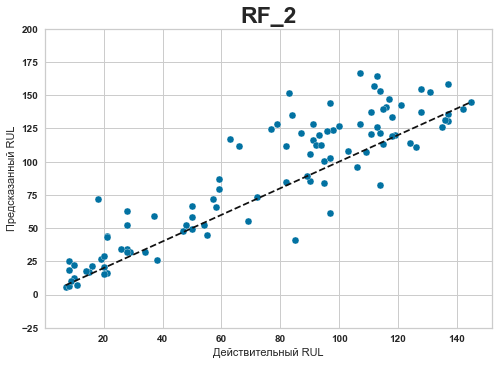

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
ax.set_title('RF_2')
plt.xticks([20, 40, 60, 80, 100, 120, 140])
plt.yticks([-25, 0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.show()

SVR

In [371]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(transformed_data, transformed_RUL, test_size=0.2, random_state=1234)

param = {
    'C': [1, 1.1],
    'epsilon': [.05, .1, .15]
}

grid_SVR = GridSearchCV(estimator=SVR()
                            , cv=5
                            , param_grid = param
                            , scoring = 'neg_mean_squared_error'
                            , n_jobs = -1
                           )

grid_SVR.fit(X_train, y_train)
print(grid_SVR.best_estimator_)

y_pred = grid_SVR.predict(X_test)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler_min_max.inverse_transform(np.array(y_test).reshape(-1, 1))
print("SVR Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("SVR Error: ", mean_absolute_error(y_test, y_pred))
print("SVR r-squared: ", r2_score(y_test, y_pred))

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR Mean Squared Error:  1332.667337011774
SVR Error:  25.392732990540637
SVR r-squared:  0.6439218864180476


In [175]:
clf = load('svr_2.joblib')
y_pred = clf.predict(transformed_data_test)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_true = answer_RUL['RUL']
print("SVR Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("SVR Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("SVR r-squared: ", r2_score(y_true, y_pred))

SVR Mean Squared Error:  635.9718562705895
SVR Mean Absolute Error:  19.190561002724102
SVR r-squared:  0.6317198147036756


In [370]:
#dump(grid_SVR.best_estimator_, 'svr_2.joblib') 

In [177]:
clf = load('svr_1.joblib')
y_pred = clf.predict(test_last)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_true = answer_RUL['RUL']
print("SVR Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("SVR Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("SVR r-squared: ", r2_score(y_true, y_pred))

SVR Mean Squared Error:  866.8077317685097
SVR Mean Absolute Error:  21.75411773844051
SVR r-squared:  0.498046794171077


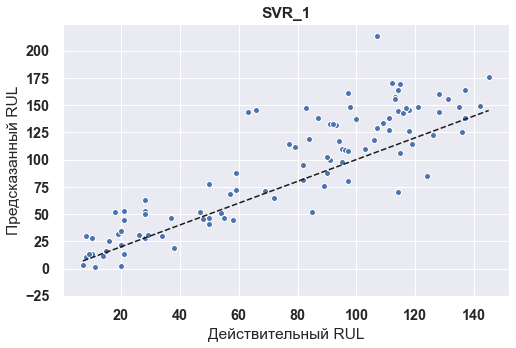

In [179]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
ax.set_title('SVR_1')
plt.xticks([20, 40, 60, 80, 100, 120, 140])
plt.yticks([-25, 0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.show()

Линейная регрессия

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, RUL_scale, test_size=0.2, random_state=1234)

grid_LinearRegression = GridSearchCV(estimator=LinearRegression()
                            , cv=5
                            , param_grid = {'normalize':[False, True]}
                            , scoring = 'neg_mean_squared_error'
                            , n_jobs = -1
                           )
grid_LinearRegression.fit(X_train, y_train)
print(grid_LinearRegression.best_estimator_)

y_pred = grid_LinearRegression.predict(X_test)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler_min_max.inverse_transform(np.array(y_test).reshape(-1, 1))

print("Linea Regression Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Linear Regression Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Linear Regression r-squared: ", r2_score(y_test, y_pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Linea Regression Mean Squared Error:  2017.6441627653255
Linear Regression Mean Absolute Error:  34.508583248149144
Linear Regression r-squared:  0.573091927498633


In [379]:
#dump(grid_LinearRegression.best_estimator_, 'lr_1.joblib') 

In [376]:
# y_pred = grid_LinearRegression.predict(transformed_data_test)
# y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
# y_true = answer_RUL['RUL']
# print("SVR Mean Squared Error: ", mean_squared_error(y_true, y_pred))
# print("SVR Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
# print("SVR r-squared: ", r2_score(y_true, y_pred))

In [85]:
y_pred = grid_LinearRegression.predict(test_last)
y_pred = scaler_min_max.inverse_transform(y_pred.reshape(-1, 1))
y_true = answer_RUL['RUL']
print("SVR Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("SVR Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("SVR r-squared: ", r2_score(y_true, y_pred))

SVR Mean Squared Error:  1024.5942549762963
SVR Mean Absolute Error:  25.54561310525662
SVR r-squared:  0.40667537666057907


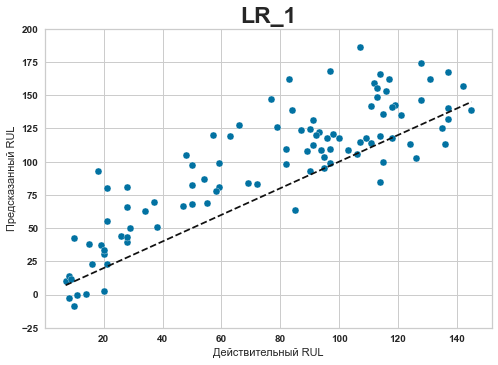

In [86]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
ax.set_title('LR_1')
plt.xticks([20, 40, 60, 80, 100, 120, 140])
plt.yticks([-25, 0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.show()

Нелинейная регрессия

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [89]:
lr = lm.LinearRegression()

In [90]:
for deg in [2]:
    model = make_pipeline(PolynomialFeatures(deg), lr)
    model.fit(transformed_data, transformed_RUL)
    y_pred = model.predict(transformed_data_test)
    y_pred = scaler_min_max.inverse_transform(np.array(y_pred).reshape(-1, 1))
    y_true = answer_RUL['RUL']
    print ("R-squared for degree " + str(deg) + " = ", r2_score(y_true, y_pred))
    print("SVR Mean Squared Error: ", mean_squared_error(y_true, y_pred))
    print("SVR Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))

R-squared for degree 2 =  0.6344115829438823
SVR Mean Squared Error:  631.3235235263311
SVR Mean Absolute Error:  19.6260196352005


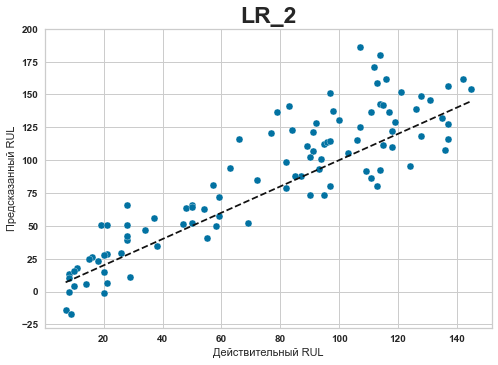

In [91]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
ax.set_title('LR_2')
plt.xticks([20, 40, 60, 80, 100, 120, 140])
plt.yticks([-25, 0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.show()

In [387]:
#dump(model, 'lr_2.joblib') 

LSTM 

In [39]:
window = 3
last = 31 - window
lasr_sensor = [10, 20, last]

In [40]:
transformed_data_aa = pd.DataFrame()
for unit_num in train_df['Unit_Number'].unique():
    temp = gen_history(train_df[train_df['Unit_Number']==unit_num], lasr_sensor, X.columns)
    transformed_data_aa = pd.concat([transformed_data_aa, temp])

In [41]:
transformed_data_aa.shape

(17831, 56)

In [42]:
o_unit = pd.DataFrame(np.copy(transformed_data_aa), columns=transformed_data_aa.columns, index=transformed_data_aa.index)
o_unit['Unit_Number'] = train_df.loc[transformed_data_aa.index]['Unit_Number']
o_unit['RUL'] = train_df.loc[transformed_data_aa.index]['RUL']

In [51]:
# generator for the sequences
seq_gen_aa = (list(gen_sequence(o_unit[o_unit['Unit_Number']==unit_num], window, transformed_data_aa.columns)) 
           for unit_num in o_unit['Unit_Number'].unique())

In [52]:
# generate sequences and convert to numpy array
seq_array_aa = np.concatenate(list(seq_gen_aa)).astype(np.float32)
seq_array_aa.shape

(17531, 3, 56)

In [54]:
# generator for the sequences
rul_gen_aa = (list(gen_rul(o_unit[o_unit['Unit_Number']==unit_num], window, ['RUL'])) 
           for unit_num in o_unit['Unit_Number'].unique())

In [55]:
rul_array_aa = np.concatenate(list(rul_gen_aa)).astype(np.float32)
rul_array_aa.shape

(17531, 1)

In [58]:
model = Sequential()

model.add(LSTM(
         input_shape=(window, seq_array_aa.shape[2]),
         units=100,
         return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(
          units=30,
          return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
%%time
# fit the network
model.fit(seq_array_aa, rul_array_aa, epochs=15, batch_size=200, validation_split=0.05, verbose=1)

Train on 16654 samples, validate on 877 samples
Epoch 1/15
16654/16654 [==============================] - 2s 94us/step - loss: 0.0325 - val_loss: 0.0089
Epoch 2/15
16654/16654 [==============================] - 1s 43us/step - loss: 0.0151 - val_loss: 0.0085
Epoch 3/15
16654/16654 [==============================] - 1s 41us/step - loss: 0.0128 - val_loss: 0.0085
Epoch 4/15
16654/16654 [==============================] - 1s 44us/step - loss: 0.0118 - val_loss: 0.0083
Epoch 5/15
16654/16654 [==============================] - 1s 41us/step - loss: 0.0110 - val_loss: 0.0085
Epoch 6/15
16654/16654 [==============================] - 1s 42us/step - loss: 0.0105 - val_loss: 0.0084
Epoch 7/15
16654/16654 [==============================] - 1s 40us/step - loss: 0.0101 - val_loss: 0.0083
Epoch 8/15
16654/16654 [==============================] - 1s 42us/step - loss: 0.0098 - val_loss: 0.0083
Epoch 9/15
16654/16654 [==============================] - 1s 41us/step - loss: 0.0096 - val_loss: 0.0084
Epoch 1

In [63]:
y_pred = model.predict(seq_array_aa, verbose=1, batch_size=500)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = scaler_min_max.inverse_transform(np.array(rul_array_aa).reshape(-1, 1))
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("r-squared: ", r2_score(y_true, y_pred))

17531/17531 [==============================] - 0s 8us/step
Mean Squared Error:  969.37164
Mean Absolute Error:  20.865334
r-squared:  0.7433314346268192


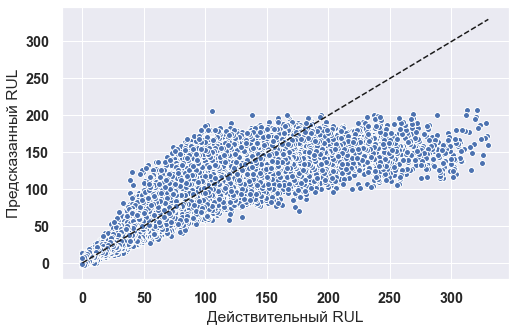

In [201]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
plt.show()

In [104]:
transformed_data_aa = pd.DataFrame()
for unit_num in test_df['Unit_Number'].unique():
    temp = gen_history(test_df[test_df['Unit_Number']==unit_num], lasr_sensor, X.columns)
    transformed_data_aa = pd.concat([transformed_data_aa, temp])

In [105]:
o_unit_test = pd.DataFrame(np.copy(transformed_data_aa), columns=transformed_data_aa.columns, index=transformed_data_aa.index)
o_unit_test['Unit_Number'] = test_df.loc[transformed_data_aa.index]['Unit_Number']

In [106]:
seq_array_test_last_aa = [o_unit_test[o_unit_test['Unit_Number']==unit_num][transformed_data_aa.columns].values[-window:] 
                       for unit_num in o_unit_test['Unit_Number'].unique()]

seq_array_test_last_aa = np.asarray(seq_array_test_last_aa).astype(np.float32)
seq_array_test_last_aa.shape

(100, 3, 56)

In [322]:
y_pred = model.predict(seq_array_test_last_aa, verbose=1, batch_size=200)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = answer_RUL['RUL']
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("r-squared: ", r2_score(y_true, y_pred))

100/100 [==============================] - 0s 30us/step
Mean Squared Error:  510.11555682760735
Mean Absolute Error:  16.350249354839324
r-squared:  0.7046009977663585


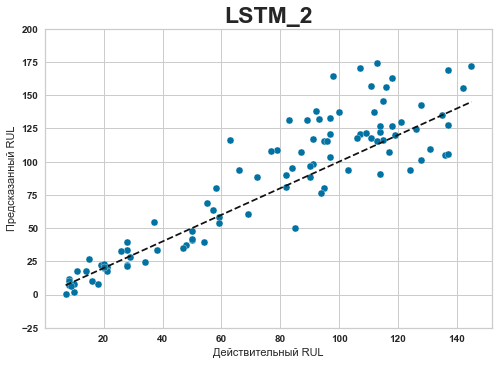

In [108]:
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
ax.set_xlabel('Действительный RUL')
ax.set_ylabel('Предсказанный RUL')
ax.set_title('LSTM_2')
plt.xticks([20, 40, 60, 80, 100, 120, 140])
plt.yticks([-25, 0, 25, 50, 75, 100, 125, 150, 175, 200])
plt.show()

In [119]:
#model.save('LSTM_3.h5')

In [107]:
new_model = keras.models.load_model('LSTM_3.h5')
y_pred = new_model.predict(seq_array_test_last_aa, verbose=1, batch_size=200)
y_pred = scaler_min_max.inverse_transform(y_pred)
y_true = answer_RUL['RUL']
print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
print("r-squared: ", r2_score(y_true, y_pred))

100/100 [==============================] - 0s 1ms/step
Mean Squared Error:  510.11555682760735
Mean Absolute Error:  16.350249354839324
r-squared:  0.7046009977663585


In [200]:
# y_pred = new_model.predict(seq_array_aa, verbose=1, batch_size=500)
# y_pred = scaler_min_max.inverse_transform(y_pred)
# y_true = scaler_min_max.inverse_transform(np.array(rul_array_aa).reshape(-1, 1))
# print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
# print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
# print("r-squared: ", r2_score(y_true, y_pred))

17531/17531 [==============================] - 2s 135us/step
Mean Squared Error:  977.14746
Mean Absolute Error:  20.643238
r-squared:  0.741272579035469


In [69]:
# sns.residplot(y_pred, y_true)

In [64]:
residuals = y_true - y_pred.reshape(100,)

In [87]:
residuals_1 = y_true - y_pred.reshape(100,)

In [52]:
residuals_2 = y_true - y_pred.reshape(100,)

In [78]:
residuals_3 = y_true - y_pred.reshape(100,)

In [92]:
residuals_4 = y_true - y_pred.reshape(100,)

In [109]:
residuals_5 = y_true - y_pred.reshape(100,)

In [102]:
residuals_6 = y_true - y_pred.reshape(100,)

In [83]:
residuals_7 = y_true - y_pred.reshape(100,)

In [68]:
# import statsmodels.api as sm
# sm.qqplot(residuals, line='45')
# plt.show()

In [47]:
from yellowbrick.regressor import ResidualsPlot

c:\users\kiril\pycharmprojects\predictive_maintenance\venv\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


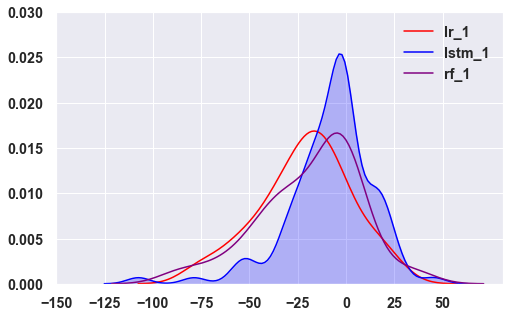

In [113]:
plt.rcParams["figure.figsize"] = (8,5)
sns.kdeplot(residuals_1, shade=False, color='red', label='lr_1')
sns.kdeplot(residuals, shade=True, color='blue', label='lstm_1')
#sns.kdeplot(residuals_2, shade=False, color='green', label='svr_1')
sns.kdeplot(residuals_3, shade=False, color='purple', label='rf_1')
plt.xticks([-150, -125, -100, -75, -50, -25, 0, 25, 50])
plt.yticks([0, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030])
plt.show()

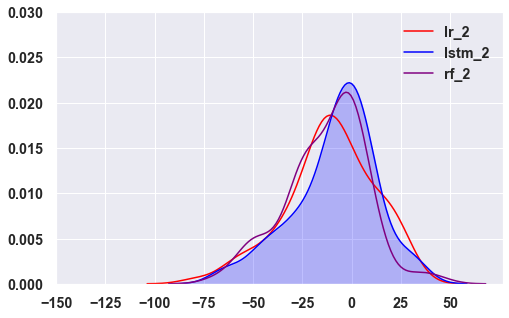

In [114]:
sns.kdeplot(residuals_4, shade=False, color='red', label='lr_2')
sns.kdeplot(residuals_5, shade=True, color='blue', label='lstm_2')
#sns.kdeplot(residuals_6, shade=False, color='green', label='svr_2')
sns.kdeplot(residuals_7, shade=False, color='purple', label='rf_2')
plt.xticks([-150, -125, -100, -75, -50, -25, 0, 25, 50])
plt.yticks([0, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030])
plt.show()